## Data Pre-Processing

In [1]:
import pandas as pd

In [2]:
current_europe_hiring = pd.read_csv("Raw Data\\Hiring in Europe current.csv")
current_europe_market = pd.read_csv('Raw Data\\Job market in Europe current.csv')
current_europe_jobs = pd.read_csv('Raw Data\\jobs in Europe current.csv')

past_europe_hiring = pd.read_csv("Raw Data\\Hiring in Europe past.csv")
past_europe_market = pd.read_csv('Raw Data\\Job market in Europe past.csv')
past_europe_jobs = pd.read_csv('Raw Data\\jobs in Europe past.csv')

current_us_hiring = pd.read_csv("Raw Data\\Hiring in the US current.csv")
current_us_market = pd.read_csv('Raw Data\\Job market in the US current.csv')
current_us_jobs = pd.read_csv('Raw Data\\jobs in the US current.csv')

past_us_hiring = pd.read_csv("Raw Data\\Hiring in the US past.csv")
past_us_market = pd.read_csv('Raw Data\\Job market in the US past.csv')
past_us_jobs = pd.read_csv('Raw Data\\jobs in the US past.csv')

In [20]:
# merging per region & time period (dropping duplicates)
europe_current = pd.concat([current_europe_hiring, current_europe_jobs, current_europe_market], ignore_index=True).drop_duplicates()
europe_past = pd.concat([past_europe_hiring, past_europe_market, past_europe_jobs], ignore_index=True).drop_duplicates()

us_current = pd.concat([current_us_hiring, current_us_jobs, current_us_market], ignore_index=True).drop_duplicates()
us_past = pd.concat([past_us_hiring, past_us_jobs, past_us_market], ignore_index=True).drop_duplicates()

# dropping non-ascii titles (non-english titles)
europe_current = europe_current[europe_current['videoTitle'].str.encode('ascii', 'ignore').str.decode('ascii').str.len() == europe_current['videoTitle'].str.len()]
europe_past = europe_past[europe_past['videoTitle'].str.encode('ascii', 'ignore').str.decode('ascii').str.len() == europe_past['videoTitle'].str.len()]
us_current = us_current[us_current['videoTitle'].str.encode('ascii', 'ignore').str.decode('ascii').str.len() == us_current['videoTitle'].str.len()]
us_past = us_past[us_past['videoTitle'].str.encode('ascii', 'ignore').str.decode('ascii').str.len() == us_past['videoTitle'].str.len()]

europe_current.shape, europe_past.shape, us_current.shape, us_past.shape


((4838, 8), (2143, 8), (7449, 8), (3448, 8))

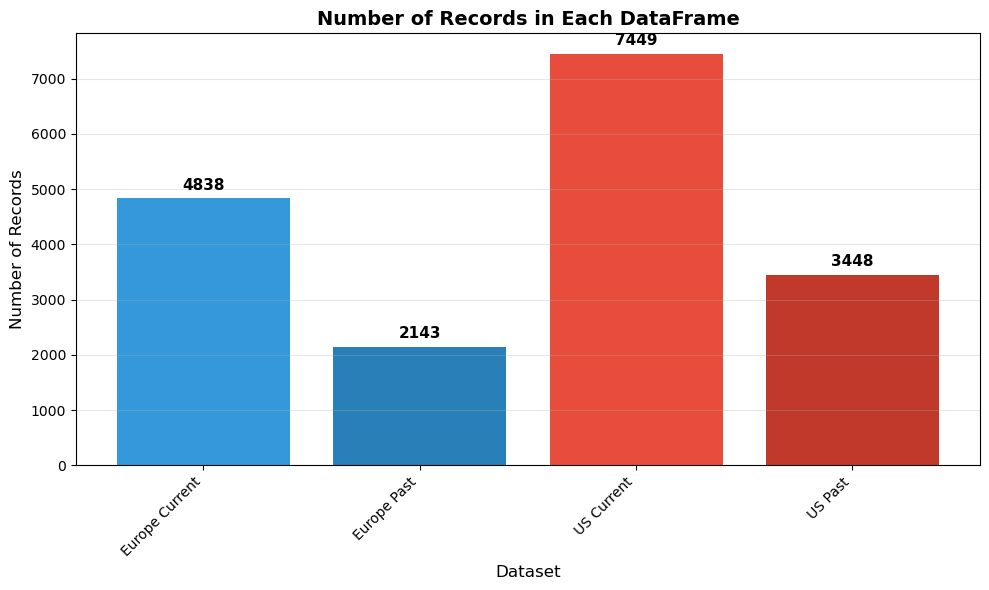

In [10]:
import matplotlib.pyplot as plt

# Create data for visualization
dataframes = {
    'Europe Current': len(europe_current),
    'Europe Past': len(europe_past),
    'US Current': len(us_current),
    'US Past': len(us_past)
}

# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(dataframes.keys(), dataframes.values(), color=['#3498db', '#2980b9', '#e74c3c', '#c0392b'])
plt.xlabel('Dataset', fontsize=12)
plt.ylabel('Number of Records', fontsize=12)
plt.title('Number of Records in Each DataFrame', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')

# Add value labels on top of bars
for i, (key, value) in enumerate(dataframes.items()):
    plt.text(i, value + 100, str(value), ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.grid(axis='y', alpha=0.3)
plt.show()

In [ ]:
import spacy

# Load spacy model
nlp = spacy.load("en_core_web_sm")

# Function to extract named entities
def extract_entities(text, entity_types=['ORG', 'LOC', 'GPE', 'EVENT']):
    if pd.isna(text):
        return []
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents if ent.label_ in entity_types]
    return entities

# Process all dataframes
europe_current['entities'] = europe_current['commentText'].apply(extract_entities)
europe_past['entities'] = europe_past['commentText'].apply(extract_entities)
us_current['entities'] = us_current['commentText'].apply(extract_entities)
us_past['entities'] = us_past['commentText'].apply(extract_entities)

# Create a combined dataframe with NER results
ner_results = []

for df, region, period in [(europe_current, 'Europe', 'Current'), 
                            (europe_past, 'Europe', 'Past'),
                            (us_current, 'US', 'Current'), 
                            (us_past, 'US', 'Past')]:
    for idx, row in df.iterrows():
        for entity, label in row['entities']:
            ner_results.append({
                'region': region,
                'period': period,
                'entity': entity,
                'entity_type': label,
                'commentText': row['commentText']
            })

ner_df = pd.DataFrame(ner_results)
print(f"Total entities extracted: {len(ner_df)}")
ner_df.head(20)

Total entities extracted: 8448


,region,period,entity,entity_type,commentText
0,Europe,Current,The Low-Tech Guide,ORG,✅ GET CURATED RESUME TEMPLATES WITH AI PROMPTS...
1,Europe,Current,Technical Writer,ORG,The 2nd job is Technical Writer. It's a lot mo...
2,Europe,Current,User Manuals,ORG,Just a note: Documentation Writer is SAME as U...
3,Europe,Current,Standard Operating Procedures,ORG,Just a note: Documentation Writer is SAME as U...
4,Europe,Current,Data Centers,ORG,Just a note: Documentation Writer is SAME as U...
5,Europe,Current,YT,ORG,You dropped the best career gems I've seen on ...
6,Europe,Current,México,GPE,You should do a video for international remote...
7,Europe,Current,SOP,ORG,I have written several SOP documents over my c...
8,Europe,Current,the User Manual Writer,ORG,As a technical writer who's performed in both ...
9,Europe,Current,AI,GPE,As a technical writer who's performed in both ...


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\horne\AppData\Roaming\nltk_data...


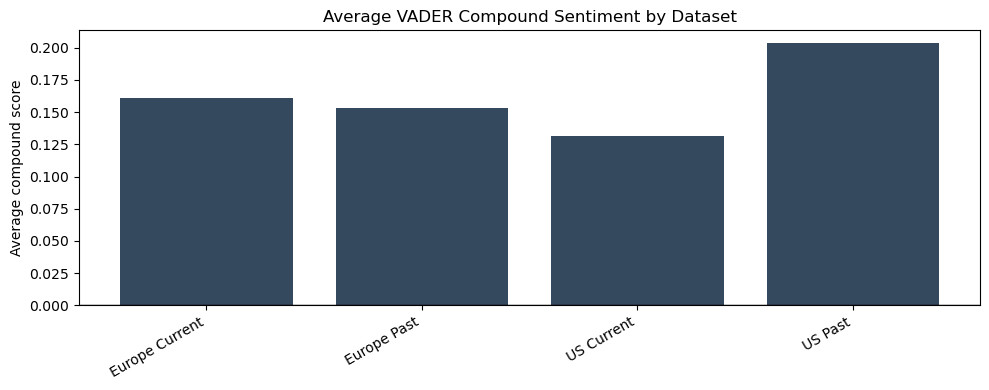

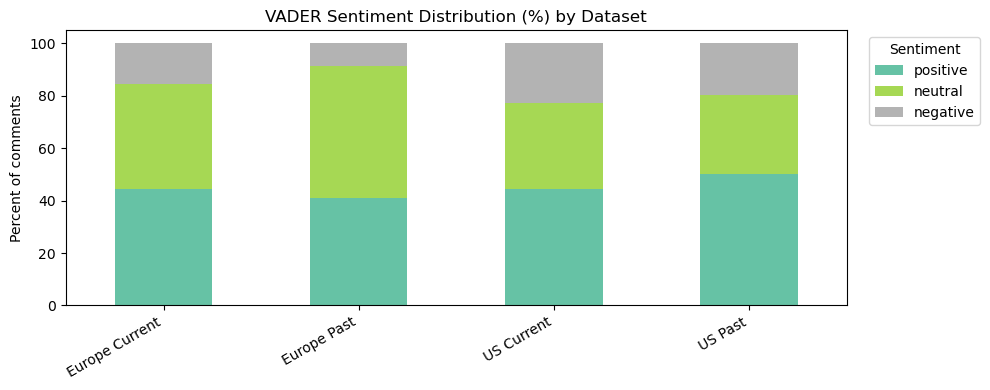

In [17]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Sentiment analysis (VADER) for the 4 dataframes: europe_current, europe_past, us_current, us_past

# Initialize VADER (download lexicon if missing)
try:
    sia = SentimentIntensityAnalyzer()
except LookupError:
    nltk.download("vader_lexicon")
    sia = SentimentIntensityAnalyzer()

def _vader_label(compound: float, pos_th: float = 0.05, neg_th: float = -0.05) -> str:
    if compound >= pos_th:
        return "positive"
    if compound <= neg_th:
        return "negative"
    return "neutral"

def add_vader_sentiment(df: pd.DataFrame, text_col: str = "commentText") -> pd.DataFrame:
    scores = df[text_col].fillna("").astype(str).apply(sia.polarity_scores).apply(pd.Series)
    # scores columns: neg, neu, pos, compound
    out = df.join(scores.add_prefix("vader_"))
    out["vader_sentiment"] = out["vader_compound"].apply(_vader_label)
    return out

# Apply to all 4 datasets (overwrite to keep downstream use simple)
europe_current = add_vader_sentiment(europe_current)
europe_past = add_vader_sentiment(europe_past)
us_current = add_vader_sentiment(us_current)
us_past = add_vader_sentiment(us_past)

# Summary table
def sentiment_summary(df: pd.DataFrame, name: str) -> dict:
    dist = df["vader_sentiment"].value_counts(normalize=True).reindex(["positive", "neutral", "negative"]).fillna(0.0)
    return {
        "dataset": name,
        "n_comments": len(df),
        "avg_compound": df["vader_compound"].mean(),
        "median_compound": df["vader_compound"].median(),
        "positive_%": 100 * dist["positive"],
        "neutral_%": 100 * dist["neutral"],
        "negative_%": 100 * dist["negative"],
    }

summary_df = pd.DataFrame(
    [
        sentiment_summary(europe_current, "Europe Current"),
        sentiment_summary(europe_past, "Europe Past"),
        sentiment_summary(us_current, "US Current"),
        sentiment_summary(us_past, "US Past"),
    ]
).sort_values("dataset")

summary_df

# Quick visualization: average compound and sentiment distribution
plt.figure(figsize=(10, 4))
plt.bar(summary_df["dataset"], summary_df["avg_compound"], color="#34495e")
plt.axhline(0, color="black", linewidth=1)
plt.title("Average VADER Compound Sentiment by Dataset")
plt.ylabel("Average compound score")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()

dist_df = pd.DataFrame({
    "positive": summary_df["positive_%"].values,
    "neutral": summary_df["neutral_%"].values,
    "negative": summary_df["negative_%"].values,
}, index=summary_df["dataset"])

ax = dist_df.plot(kind="bar", stacked=True, figsize=(10, 4), colormap="Set2")
ax.set_title("VADER Sentiment Distribution (%) by Dataset")
ax.set_ylabel("Percent of comments")
ax.set_xlabel("")
plt.xticks(rotation=30, ha="right")
plt.legend(title="Sentiment", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()

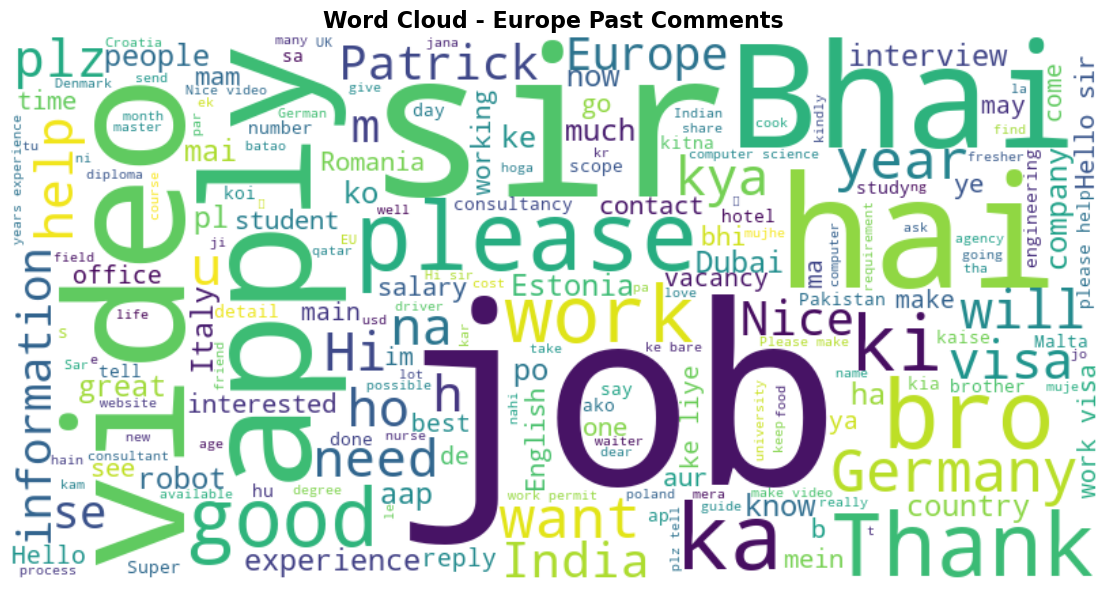

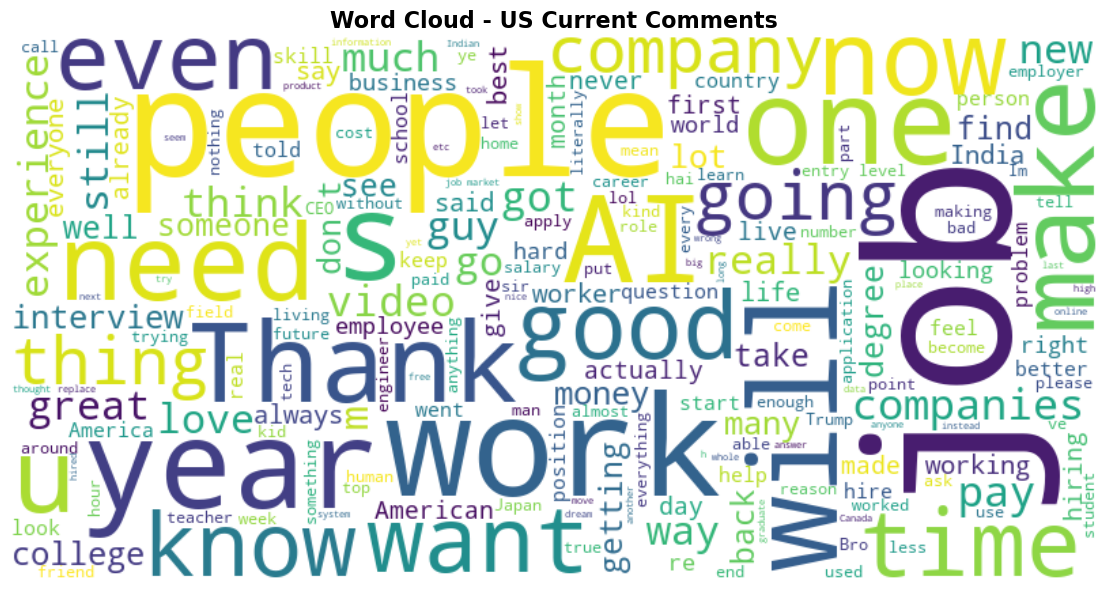

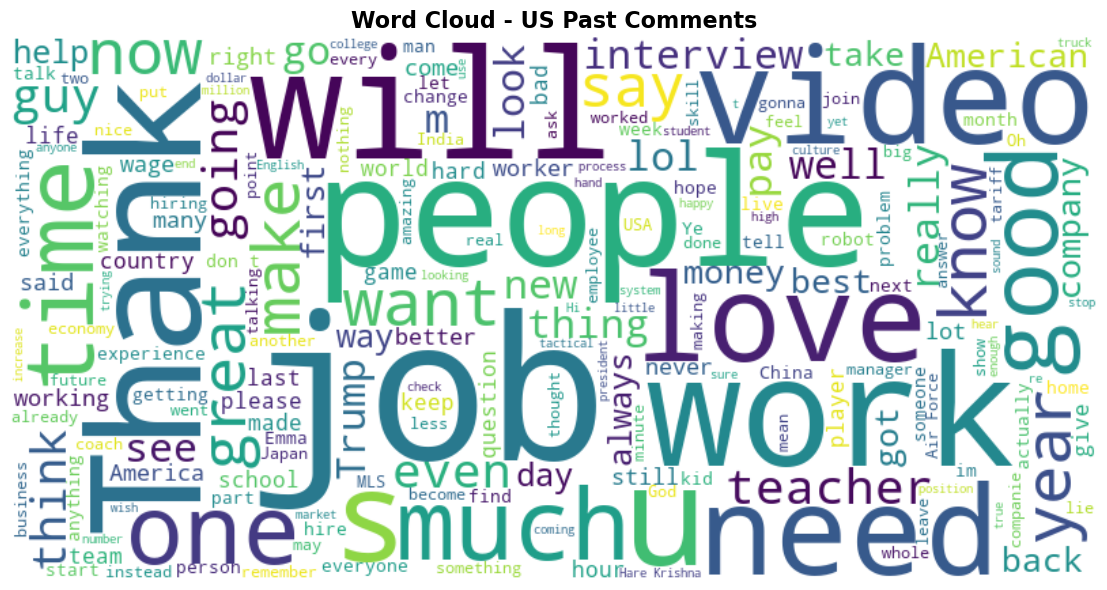

In [ ]:
from wordcloud import WordCloud
# Word cloud for europe_past
text_europe_past = ' '.join(europe_past['commentText'].dropna())
wordcloud_europe_past = WordCloud(width=800, height=400, background_color='white').generate(text_europe_past)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_europe_past, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Europe Past Comments', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Word cloud for us_current
text_us_current = ' '.join(us_current['commentText'].dropna())
wordcloud_us_current = WordCloud(width=800, height=400, background_color='white').generate(text_us_current)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_us_current, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - US Current Comments', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Word cloud for us_past
text_us_past = ' '.join(us_past['commentText'].dropna())
wordcloud_us_past = WordCloud(width=800, height=400, background_color='white').generate(text_us_past)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_us_past, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - US Past Comments', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [21]:
import re
import sys
import subprocess
from gensim.utils import simple_preprocess
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from pyvis.network import Network
from IPython.display import IFrame, display
from nltk.corpus import stopwords
from nltk.corpus import stopwords

# Topic modeling (LDA via gensim) + visualization with pyvis (topic-word network)


# Install deps if missing (safe to rerun)
for pkg in ["gensim", "pyvis"]:
    try:
        __import__(pkg)
    except ImportError:
        subprocess.check_call([sys.executable, "-m", "pip", "install", "-q", pkg])


# NLTK stopwords (nltk already imported earlier)
try:
    _stopwords = set(stopwords.words("english"))
except LookupError:
    nltk.download("stopwords")
    _stopwords = set(stopwords.words("english"))

def _clean_text(s: str) -> str:
    s = str(s)
    s = re.sub(r"http\S+|www\.\S+", " ", s)     # urls
    s = re.sub(r"@\w+", " ", s)                 # @mentions
    s = re.sub(r"#\w+", " ", s)                 # hashtags
    s = re.sub(r"[^A-Za-z\s']", " ", s)         # keep letters/apostrophes
    s = re.sub(r"\s+", " ", s).strip().lower()
    return s

def _tokenize(s: str):
    tokens = simple_preprocess(_clean_text(s), deacc=True, min_len=3)
    return [t for t in tokens if t not in _stopwords]

def lda_with_pyvis(
    df,
    text_col="commentText",
    num_topics=8,
    passes=10,
    random_state=42,
    topn_words=12,
    min_doc_freq=5,
    max_doc_prop=0.5,
    html_path="lda_pyvis_us_current.html",
):
    texts = df[text_col].dropna().astype(str).tolist()
    tokenized = [_tokenize(t) for t in texts]
    tokenized = [toks for toks in tokenized if toks]  # drop empty docs

    dictionary = Dictionary(tokenized)
    dictionary.filter_extremes(no_below=min_doc_freq, no_above=max_doc_prop)
    corpus = [dictionary.doc2bow(toks) for toks in tokenized]
    corpus = [bow for bow in corpus if len(bow) > 0]

    lda = LdaModel(
        corpus=corpus,
        id2word=dictionary,
        num_topics=num_topics,
        passes=passes,
        random_state=random_state,
        alpha="auto",
        eta="auto",
    )

    # topic sizes via dominant topic per document
    topic_counts = {k: 0 for k in range(num_topics)}
    for bow in corpus:
        dist = lda.get_document_topics(bow, minimum_probability=0.0)
        dom_topic = max(dist, key=lambda x: x[1])[0]
        topic_counts[dom_topic] += 1

    net = Network(height="750px", width="100%", bgcolor="#ffffff", font_color="#222", notebook=True, directed=False)
    net.barnes_hut()

    # Add topic nodes
    for k in range(num_topics):
        net.add_node(
            f"topic_{k}",
            label=f"Topic {k}\n(n={topic_counts.get(k, 0)})",
            shape="dot",
            size=18 + 0.01 * topic_counts.get(k, 0),
            color="#34495e",
            title=f"Topic {k}",
        )

    # Add word nodes + edges topic->word
    word_node_ids = set()
    for k in range(num_topics):
        for word, weight in lda.show_topic(k, topn=topn_words):
            wid = f"word_{word}"
            if wid not in word_node_ids:
                net.add_node(
                    wid,
                    label=word,
                    shape="ellipse",
                    size=10,
                    color="#2ecc71",
                    title=f"word: {word}",
                )
                word_node_ids.add(wid)

            net.add_edge(
                f"topic_{k}",
                wid,
                value=float(weight) * 10.0,
                title=f"P({word}|Topic {k}) = {weight:.4f}",
                color="rgba(52, 152, 219, 0.35)",
            )

    # Save + display
    net.show(html_path)
    display(IFrame(src=html_path, width="100%", height=780))

    return lda, dictionary, corpus, net

# Run on US current comments (change df to us_past / europe_current / europe_past as needed)
lda_model_us_current, lda_dict_us_current, lda_corpus_us_current, lda_net_us_current = lda_with_pyvis(
    us_current,
    num_topics=8,
    passes=12,
    topn_words=12,
    html_path="lda_pyvis_us_current.html",
)

# Optional: print the topics
for k, terms in lda_model_us_current.print_topics(num_topics=8, num_words=10):
    print(f"Topic {k}: {terms}")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\horne\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


lda_pyvis_us_current.html


Topic 0: 0.047*"people" + 0.014*"money" + 0.013*"know" + 0.013*"make" + 0.012*"companies" + 0.010*"going" + 0.010*"think" + 0.010*"business" + 0.009*"data" + 0.008*"jobs"
Topic 1: 0.022*"like" + 0.020*"job" + 0.018*"actually" + 0.017*"interview" + 0.013*"company" + 0.012*"get" + 0.012*"hiring" + 0.012*"companies" + 0.012*"real" + 0.012*"even"
Topic 2: 0.016*"country" + 0.016*"work" + 0.016*"love" + 0.014*"first" + 0.013*"need" + 0.013*"videos" + 0.011*"thank" + 0.010*"yes" + 0.009*"america" + 0.009*"american"
Topic 3: 0.026*"thanks" + 0.021*"sir" + 0.015*"replace" + 0.014*"fake" + 0.014*"grade" + 0.013*"nice" + 0.013*"good" + 0.011*"grades" + 0.010*"right" + 0.010*"love"
Topic 4: 0.018*"level" + 0.018*"jobs" + 0.018*"good" + 0.018*"like" + 0.015*"entry" + 0.014*"job" + 0.010*"india" + 0.009*"years" + 0.009*"many" + 0.009*"economy"
Topic 5: 0.026*"work" + 0.016*"job" + 0.015*"one" + 0.013*"get" + 0.013*"want" + 0.012*"jobs" + 0.011*"would" + 0.010*"people" + 0.010*"take" + 0.010*"every"